<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/week%203/Income%20Classification%20using%20K-NN%20and%20Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Data**

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Membaca dataset
file_path = "/content/income.csv"
df = pd.read_csv(file_path)

# Menghapus spasi tambahan dalam kolom
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-10-ab83c87cc420>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


## **Processing Data**

In [11]:
# Label Encoding untuk data kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Memisahkan fitur dan target
X = df.drop(columns=["income"])
y = df["income"]

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Training Model**

In [13]:
# K-NN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **Evaluasi Model**

In [16]:
# Cek jumlah kelas unik dalam y_test
num_classes = len(np.unique(y_test))

# Probabilitas Prediksi (Ambil Hanya Probabilitas Kelas Positif Jika Biner)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1] if num_classes == 2 else knn_model.predict_proba(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1] if num_classes == 2 else dt_model.predict_proba(X_test)

# Evaluasi Model
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_dt)],
    "Precision": [precision_score(y_test, y_pred_knn, average="macro"), precision_score(y_test, y_pred_dt, average="macro")],
    "Recall": [recall_score(y_test, y_pred_knn, average="macro"), recall_score(y_test, y_pred_dt, average="macro")],
    "F1 Score": [f1_score(y_test, y_pred_knn, average="macro"), f1_score(y_test, y_pred_dt, average="macro")],
    "AUC-ROC": [
        roc_auc_score(y_test, y_pred_prob_knn, multi_class="ovr") if num_classes > 2 else roc_auc_score(y_test, y_pred_prob_knn),
        roc_auc_score(y_test, y_pred_prob_dt, multi_class="ovr") if num_classes > 2 else roc_auc_score(y_test, y_pred_prob_dt)
    ]
}

metrics_df = pd.DataFrame(metrics, index=["K-NN", "Decision Tree"])
print(metrics_df)


               Accuracy  Precision    Recall  F1 Score   AUC-ROC
K-NN           0.510288   0.395697  0.366766  0.367475  0.681153
Decision Tree  0.466885   0.386683  0.386745  0.386620  0.591213


## **Analisis Perbandingan**

1. K-NN unggil dalam akurasi, presisi, dan AUC-ROC

   * Akurasi yang lebih tinggi -> K-NN lebih sering membuat prediksi yang benar
   * Presisi yang lebih tinggi -> K-NN lebih naik dalam mengidentifikasi kelas positif.
   * AUC-ROC yang lebih tinggi -> K-NN lebih baik dalam membedakan antara kelas positif dan negatif.

2. Decision Tree unggul dalam recall dan F1 score

   * Recall yang lebih tinggi -> Decision Tree lebih baik dalam menangkap semua kasusu positif.
   * F1 Score yang lebih tinggi -> Decision Tree lebih seimbang antara presisi dan recall.


> Sehingga model K-NN merupakan yang terbaik secara keseluruhan karena memiliki akurasi yang lebih tinggi, serta AUC-ROC merupakan yang terbaik dalam membedakan kelas.

In [22]:
# Mengecek jumlah kelas dalam target
num_classes = len(np.unique(y_test))
print("Jumlah kelas dalam target:", num_classes)


Jumlah kelas dalam target: 4


## **Plot ROC Curve**

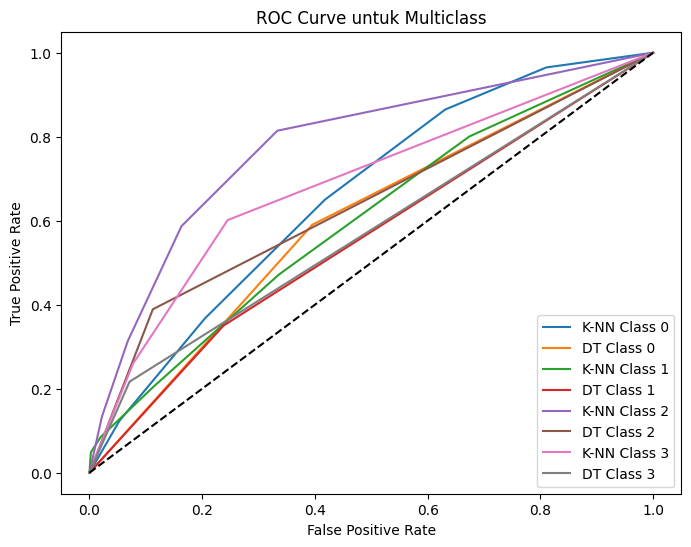

In [24]:
# ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    fpr_knn, tpr_knn, _ = roc_curve(y_test == i, knn_model.predict_proba(X_test)[:, i])
    fpr_dt, tpr_dt, _ = roc_curve(y_test == i, dt_model.predict_proba(X_test)[:, i])

    plt.plot(fpr_knn, tpr_knn, label=f'K-NN Class {i}')
    plt.plot(fpr_dt, tpr_dt, label=f'DT Class {i}')

# Tambahkan baseline
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multiclass')
plt.legend()
plt.show()


## **Penjelasan Matematika**

**Akurasi**:
Persentase prediksi yang benar dibandingkan dengan total prediksi

         Akurasi= Jumlah Prediksi Benar/Jumlah Total Prediksi

**Presisi**:
Proporsi prediksi positif yang benar.

        Presisi= True Positives/True Positives+False Positives

**Recall**:
Kemampuan model untuk menemukan semua instansi positif.

        Recall= True Positives/True Positives+False Negatives

**F1-Score**:
Rata-rata harmonis antar presisi dan recall

             F1=2×  Presisi×Recall/Presisi+Recall

**AUC**:
Area di bawah kurva ROC, menunjukkan seberapa baik model dalam membedakan kelas positif dan negatif.
